# Singular Value Decompositions

Let's try out a couple visual examples of (truncated) SVDs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipyvolume as p3
from PIL import Image
import ipywidgets


%matplotlib inline
from IPython.core.pylabtools import figsize

figsize(5,7)

## (Linear) Manifold learning

When we do machine learning, we usually have data points that are vectors in some feature space. In many cases, however, the distribution of those vectors doesn't come anywhere near exploring that whole space, and may live on one or more surfaces of lower dimension than the ambient space.

A simple example would be points on the earth's surface- even though the earth lives in three dimensions (the ambient dimension), we can specify locations using only a latitude and a longitude- and if we zoom in enough the earth looks two dimensional (the local dimension).

If we're doing machine learning to classify 100x100 RGB images, they're probably not going to be randomly distributed over a 100x100x3-dimensional feature space. If you don't believe me, just try generating some random vectors in that space and see how long it takes you to get something that looks like a grapefruit.

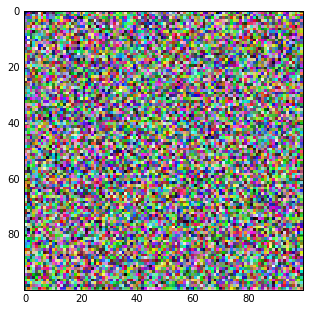

In [3]:
plt.imshow(np.random.randint(0,256, (100,100,3)), interpolation='none');

Let's generate some random data in 3D (so we can plot it) that's *mostly* near a flat 2D surface:

In [4]:
N = 1000
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
z = 2*x + 3*y + np.random.normal(0, 0.25, N)

and arrange them into an Nx3 feature matrix:

In [5]:
A = np.stack([x,y,z], axis=1)
A.shape

(1000, 3)

In [6]:
p3.figure()
p3.scatter(x, y, z, color="red", size=1)
p3.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', 
      dtype='<U5'), size=array(1), size_selected=array(2.6), x=array([  3.32705205e-01,   7.03220469e-01,   2.94006644e-01,
         3.67036659e-01,   1.37817451e-01,   1.36269209e-01,
         7.97061858e-01,   9.78510851e-01,   2.96794557e-02,
         4.21122820e-01,   4.32767973e-01,   7.79264476e-02,
         1.91477668e-01,   5.22052679e-01,   5.31464598e-01,
         1.96732432e-01,   2.85195550e-01,   2.11061490e-01,
         5.76236200e-01,   7.87923662e-01,   9.10391730e-01,
         1.24847123e-02,   6.77602589e-01,   8.23646607e-01,
         3.07466989e-01,   8.94619228e-01,   2.20257307e-01,
         7.07898357e-01,   7.06533877e-01,   4.30481734e-01,
         3.30098820e-01,   4.35546214e-01,   5.21984405e-01,
         3.80202017e-01,   8.29422229e-01,   9.15477803e-01,
         3.74292079e-01,   5.20689417e-01,   1.41712838e-01,
         2.74948309e-01,   9.74939101e-01,   6.44334331e-01,
         3.90297171e-01,   4.86907421e-01,   9.44280302e-01,
         7.46917259e-01,   2.43688145e-01,   7.81756048e-01,
         9.22477032e-01,   4.59954865e-01,   8.54685749e-01,
         9.71285010e-01,   1.38738425e-01,   7.71852016e-01,
         2.71237053e-01,   1.99274474e-01,   9.99428300e-01,
         6.56422104e-01,   8.21710255e-01,   4.24997091e-01,
         3.43299034e-01,   9.44566160e-01,   4.73695790e-01,
         6.04730938e-01,   3.70389687e-01,   7.46253330e-01,
         9.06729630e-02,   6.05018116e-01,   7.35704000e-01,
         8.03238290e-01,   4.61874511e-01,   5.15802227e-01,
         2.58869490e-02,   3.15623568e-01,   7.88817861e-01,
         2.91044100e-01,   7.05556671e-01,   8.06279292e-01,
         2.87514621e-01,   1.23580616e-01,   1.85527869e-01,
         2.57180749e-01,   2.49147375e-01,   9.84916553e-01,
         2.15717130e-01,   7.70370117e-01,   8.63501184e-01,
         9.76664096e-01,   7.21315979e-01,   8.17014788e-02,
         5.62400705e-02,   8.29203169e-01,   8.57243605e-01,
         4.36031666e-01,   7.66373647e-02,   9.20261707e-01,
         9.23804427e-01,   3.69331708e-01,   1.57800968e-02,
         3.71551046e-01,   5.16055479e-01,   5.76140864e-01,
         4.15575696e-01,   4.16172463e-01,   8.85528082e-01,
         6.12025548e-01,   1.77154562e-01,   1.26401118e-01,
         6.71792643e-01,   9.87916314e-01,   1.08026107e-01,
         4.59386628e-01,   4.41653817e-01,   3.27842487e-01,
         7.43317101e-01,   3.62555199e-01,   9.36131306e-01,
         7.75099260e-01,   9.31772312e-01,   9.70647938e-03,
         1.24901935e-01,   1.59223919e-01,   5.20078225e-01,
         3.20653027e-01,   4.82679119e-01,   9.72145009e-01,
         2.22427605e-01,   1.89572752e-01,   2.53765111e-01,
         5.73373610e-01,   6.51144835e-01,   2.55399819e-01,
         9.52604102e-01,   5.01517895e-01,   2.33583946e-01,
         7.66177835e-01,   8.19868470e-01,   6.07733220e-01,
         1.91361457e-01,   1.87210594e-01,   5.74906710e-01,
         1.98807435e-01,   8.35756735e-01,   8.72955618e-01,
         2.56404982e-01,   7.44662777e-01,   4.49106205e-01,
         3.74207543e-01,   3.06575741e-01,   4.18304486e-01,
         2.00482751e-01,   8.37639113e-01,   1.56992622e-01,
         2.87648082e-01,   1.33666250e-01,   8.47132889e-01,
         6.68378069e-01,   1.08035863e-01,   7.34811001e-02,
         8.14155129e-01,   9.17267052e-01,   8.84040348e-01,
         2.92808671e-01,   4.73232789e-01,   5.67780861e-01,
         5.49165834e-01,   9.44193853e-01,   5.27634894e-01,
         4.52281909e-01,   2.09985516e-01,   9.56977502e-02,
         7.73747105e-01,   2.77391879e-01,   2.39680108e-01,
         9.51763793e-01,   1.32391612e-01,   7.53079979e-01,
         9.45696013e-01,   4.

Now let's compute the SVD. Numpy has a function to do this in one step:

In [8]:
u, s, v = np.linalg.svd(A, full_matrices=False)

In [9]:
print("u:", u.shape)
print("s:", s.shape)
print("v:", v.shape)

u: (1000, 3)
s: (3,)
v: (3, 3)


What happens if we compare the singular values?

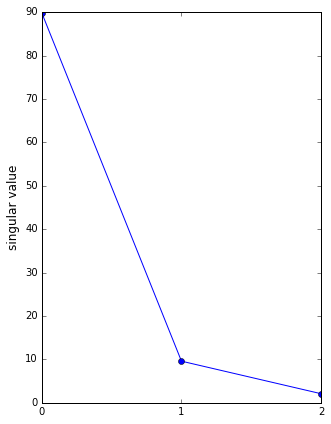

In [12]:
plt.plot(s, "o-")
plt.ylabel("singular value", fontsize=12)
plt.xticks([0,1,2]);

One of the singular values is really big, one is somewhat smaller and one is basically zero. So the decomposition found that there are *essentially* just two dimensions here.

Let's try **truncating** the SVD by removing the last singular value and reconstructing our data matrix from only the first two:

In [13]:
A_r = u[:,:2].dot(np.diag(s).dot(v)[:2,:])
A_r.shape

(1000, 3)

In the plot below, red is the original data and blue shows the same data after the truncated SVD:

In [14]:
p3.figure()
p3.scatter(x, y, z, color="red", size=1)
p3.scatter(A_r[:,0], A_r[:,1], A_r[:,2], color="blue", size=1)
p3.show()

VBox(children=(Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], scatters=[Scatter(color_selected=array('white', 
      dtype='<U5'), size=array(1), size_selected=array(2.6), x=array([  3.32705205e-01,   7.03220469e-01,   2.94006644e-01,
         3.67036659e-01,   1.37817451e-01,   1.36269209e-01,
         7.97061858e-01,   9.78510851e-01,   2.96794557e-02,
         4.21122820e-01,   4.32767973e-01,   7.79264476e-02,
         1.91477668e-01,   5.22052679e-01,   5.31464598e-01,
         1.96732432e-01,   2.85195550e-01,   2.11061490e-01,
         5.76236200e-01,   7.87923662e-01,   9.10391730e-01,
         1.24847123e-02,   6.77602589e-01,   8.23646607e-01,
         3.07466989e-01,   8.94619228e-01,   2.20257307e-01,
         7.07898357e-01,   7.06533877e-01,   4.30481734e-01,
         3.30098820e-01,   4.35546214e-01,   5.21984405e-01,
         3.80202017e-01,   8.29422229e-01,   9.15477803e-01,
         3.74292079e-01,   5.20689417e-01,   1.41712838e-01,
         2.74948309e-01,   9.74939101e-01,   6.44334331e-01,
         3.90297171e-01,   4.86907421e-01,   9.44280302e-01,
         7.46917259e-01,   2.43688145e-01,   7.81756048e-01,
         9.22477032e-01,   4.59954865e-01,   8.54685749e-01,
         9.71285010e-01,   1.38738425e-01,   7.71852016e-01,
         2.71237053e-01,   1.99274474e-01,   9.99428300e-01,
         6.56422104e-01,   8.21710255e-01,   4.24997091e-01,
         3.43299034e-01,   9.44566160e-01,   4.73695790e-01,
         6.04730938e-01,   3.70389687e-01,   7.46253330e-01,
         9.06729630e-02,   6.05018116e-01,   7.35704000e-01,
         8.03238290e-01,   4.61874511e-01,   5.15802227e-01,
         2.58869490e-02,   3.15623568e-01,   7.88817861e-01,
         2.91044100e-01,   7.05556671e-01,   8.06279292e-01,
         2.87514621e-01,   1.23580616e-01,   1.85527869e-01,
         2.57180749e-01,   2.49147375e-01,   9.84916553e-01,
         2.15717130e-01,   7.70370117e-01,   8.63501184e-01,
         9.76664096e-01,   7.21315979e-01,   8.17014788e-02,
         5.62400705e-02,   8.29203169e-01,   8.57243605e-01,
         4.36031666e-01,   7.66373647e-02,   9.20261707e-01,
         9.23804427e-01,   3.69331708e-01,   1.57800968e-02,
         3.71551046e-01,   5.16055479e-01,   5.76140864e-01,
         4.15575696e-01,   4.16172463e-01,   8.85528082e-01,
         6.12025548e-01,   1.77154562e-01,   1.26401118e-01,
         6.71792643e-01,   9.87916314e-01,   1.08026107e-01,
         4.59386628e-01,   4.41653817e-01,   3.27842487e-01,
         7.43317101e-01,   3.62555199e-01,   9.36131306e-01,
         7.75099260e-01,   9.31772312e-01,   9.70647938e-03,
         1.24901935e-01,   1.59223919e-01,   5.20078225e-01,
         3.20653027e-01,   4.82679119e-01,   9.72145009e-01,
         2.22427605e-01,   1.89572752e-01,   2.53765111e-01,
         5.73373610e-01,   6.51144835e-01,   2.55399819e-01,
         9.52604102e-01,   5.01517895e-01,   2.33583946e-01,
         7.66177835e-01,   8.19868470e-01,   6.07733220e-01,
         1.91361457e-01,   1.87210594e-01,   5.74906710e-01,
         1.98807435e-01,   8.35756735e-01,   8.72955618e-01,
         2.56404982e-01,   7.44662777e-01,   4.49106205e-01,
         3.74207543e-01,   3.06575741e-01,   4.18304486e-01,
         2.00482751e-01,   8.37639113e-01,   1.56992622e-01,
         2.87648082e-01,   1.33666250e-01,   8.47132889e-01,
         6.68378069e-01,   1.08035863e-01,   7.34811001e-02,
         8.14155129e-01,   9.17267052e-01,   8.84040348e-01,
         2.92808671e-01,   4.73232789e-01,   5.67780861e-01,
         5.49165834e-01,   9.44193853e-01,   5.27634894e-01,
         4.52281909e-01,   2.09985516e-01,   9.56977502e-02,
         7.73747105e-01,   2.77391879e-01,   2.39680108e-01,
         9.51763793e-01,   1.32391612e-01,   7.53079979e-01,
         9.45696013e-01,   4.

So the truncated SVD essentially **denoised** the data, mapping all the points to a plane. This isn't just a spiffy trick; it may help us work around the **curse of dimensionality**.

## Compression

In order to convince you that real data might have some lower-dimensional structure, let's look at the SVD of a grayscale image (e.g. a 2D array).

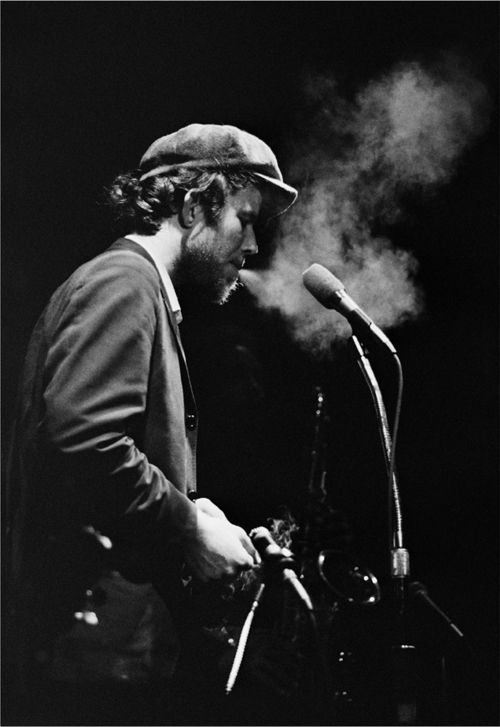

In [15]:
img = Image.open("waits.jpg").convert('L')
img

In [16]:
img_arr = np.array(img)
img_arr.shape

(727, 500)

In [17]:
im_u, im_s, im_v = np.linalg.svd(img_arr, full_matrices=False)

In [18]:
print("im_u:", im_u.shape)
print("im_s:", im_s.shape)
print("im_v:", im_v.shape)

im_u: (727, 500)
im_s: (500,)
im_v: (500, 500)


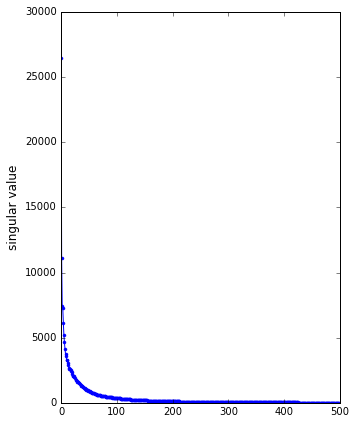

In [23]:
plt.plot(im_s, ".-")
plt.ylabel("singular value", fontsize=12);

In [21]:
def reconstruct_tom(n):
    img_r = im_u[:,:n].dot(np.diag(im_s).dot(im_v)[:n,:])
    plt.imshow(img_r, cmap="Greys_r")
    plt.axis("off")
    # compute compression ratio
    orig = img_arr.shape[0]*img_arr.shape[1]
    compressed = img_arr.shape[0]*n + img_arr.shape[1]*n + n
    ratio = round(orig/compressed, 1)
    plt.title("Compression ratio: %s"%ratio)

In [22]:
ipywidgets.interact(reconstruct_tom, n=ipywidgets.IntSlider(value=1, min=1, max=100, step=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',))

## OK wait so is SVD manifold learning or compression?

I maintain that those are largely the same thing.

## But what if the manifold isn't linear?

Well you're in luck because that's what deep neural networks do. Great visual explanations here:

http://colah.github.io/posts/2014-03-NN-Manifolds-Topology/